In [1]:
import numpy as np
from tensorflow.keras.datasets import imdb

(x_train_all, y_train_all),(x_test, y_test)=imdb.load_data(skip_top=20, num_words=100)

<__array_function__ internals>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
C:\Users\Uijeong\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\datasets\imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
C:\Users\Uijeong\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\datasets\imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different length

In [2]:
print(x_train_all.shape, y_train_all.shape)

(25000,) (25000,)


In [3]:
print(x_train_all[0]) #2는 어휘사전에 없는 단어를 의미, 가장 많이 등장하는 영단어 20개를 건너뛰었기 때문

[2, 2, 22, 2, 43, 2, 2, 2, 2, 65, 2, 2, 66, 2, 2, 2, 36, 2, 2, 25, 2, 43, 2, 2, 50, 2, 2, 2, 35, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 39, 2, 2, 2, 2, 2, 2, 38, 2, 2, 2, 2, 50, 2, 2, 2, 2, 2, 2, 22, 2, 2, 2, 2, 2, 22, 71, 87, 2, 2, 43, 2, 38, 76, 2, 2, 2, 2, 22, 2, 2, 2, 2, 2, 2, 2, 2, 2, 62, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 66, 2, 33, 2, 2, 2, 2, 38, 2, 2, 25, 2, 51, 36, 2, 48, 25, 2, 33, 2, 22, 2, 2, 28, 77, 52, 2, 2, 2, 2, 82, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 36, 71, 43, 2, 2, 26, 2, 2, 46, 2, 2, 2, 2, 2, 2, 88, 2, 2, 2, 2, 98, 32, 2, 56, 26, 2, 2, 2, 2, 2, 2, 2, 22, 21, 2, 2, 26, 2, 2, 2, 30, 2, 2, 51, 36, 28, 2, 92, 25, 2, 2, 2, 65, 2, 38, 2, 88, 2, 2, 2, 2, 2, 2, 2, 2, 32, 2, 2, 2, 2, 2, 32]


In [4]:
#2제외
for i in range (len(x_train_all)):
    x_train_all[i]=[w for w in x_train_all[i] if w>2]
    
print(x_train_all[0])

[22, 43, 65, 66, 36, 25, 43, 50, 35, 39, 38, 50, 22, 22, 71, 87, 43, 38, 76, 22, 62, 66, 33, 38, 25, 51, 36, 48, 25, 33, 22, 28, 77, 52, 82, 36, 71, 43, 26, 46, 88, 98, 32, 56, 26, 22, 21, 26, 30, 51, 36, 28, 92, 25, 65, 38, 88, 32, 32]


In [5]:
word_to_index=imdb.get_word_index()
word_to_index['movie']

17

In [6]:
index_to_word={word_to_index[k]: k for k in word_to_index}

for w in x_train_all[0]:
    print(index_to_word[w-3], end=' ')

film just story really they you just there an from so there film film were great just so much film would really at so you what they if you at film have been good also they were just are out because them all up are film but are be what they have don't you story so because all all 

In [7]:
print(len(x_train_all[0]), len(x_train_all[1]))

59 32


In [8]:
print(y_train_all[:10]) #1:긍정, 2:부정

[1 0 0 1 0 0 1 0 1 0]


In [9]:
np.random.seed(42)
random_index=np.random.permutation(25000)

x_train=x_train_all[random_index[:20000]]
y_train=y_train_all[random_index[:20000]]
x_val=x_train_all[random_index[20000:]]
y_val=y_train_all[random_index[20000:]]

In [10]:
# 샘플의 길이 맞추는 작업
import tensorflow as tf
from tensorflow.keras.preprocessing import sequence

maxlen=100
x_train_seq=sequence.pad_sequences(x_train, maxlen=maxlen)
x_val_seq=sequence.pad_sequences(x_val, maxlen=maxlen)

In [11]:
print(x_train_seq.shape, x_val_seq.shape)

(20000, 100) (5000, 100)


In [12]:
print(x_train_seq[0])

[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0 35 40 27 28 40 22 83 31 85 45
 24 23 31 70 31 76 30 98 32 22 28 51 75 56 30 33 97 53 38 46 53 74 31 35
 23 34 22 58]


In [13]:
#원-핫 인코딩
from tensorflow.keras.utils import to_categorical

x_train_onehot=to_categorical(x_train_seq)
x_val_onehot=to_categorical(x_val_seq)

In [14]:
print(x_train_onehot.shape)

(20000, 100, 100)


In [15]:
print(x_train_onehot.nbytes)

800000000


In [46]:
class RecurrentNetwork:
    def __init__(self, n_cells=10, batch_size=32, learning_rate=0.1):       
        self.n_cells=n_cells # 셀 개수
        self.batch_size=batch_size
        self.w1h=None #은닉 상태에 대한 가중치
        self.w1x=None #입력에 대한 가중치
        self.b1=None #순환층의 절편
        self.w2=None #출력층의 가중치
        self.b2=None #출력층의 절편
        self.h=None #순환층의 활성화 출력
        self.losses=[] 
        self.val_losses=[]
        self.lr=learning_rate
    def forpass(self,x):
        self.h=[np.zeros((x.shape[0], self.n_cells))] #은닉상태 초기화 크기:(샘플 개수, 셀 개수)
        # 배치 차원과 타임 스텝 차원을 바꾼다
        seq=np.swapaxes(x,0,1)
        # 순환층의 선형식을 계산한다.
        for x in seq:
            z1 = np.dot(x, self.w1x)+np.dot(self.h[-1], self.w1h)+self.b1  # 첫번째 층의 선형식을 계산합니다.
            h = np.tanh(z1) # 활성화 함수를 적용
            self.h.append(h) #역전파를 위해 은닉 상태 저장
            z2 = np.dot(h, self.w2) + self.b2   # 두번째 층의 선형식을 계산합니다.
        return z2
    def backprop(self,x,err):
        m=len(x)
        #출력층의 가중치와 절편에 대한 그레이디언트 계산
        w2_grad=np.dot(self.h[-1].T,err)/m
        b2_grad=np.sum(err)/m
        #배치차원과 타임스텝 차원을 바꿈
        seq=np.swapaxes(x,0,1)
        
        w1h_grad=w1x_grad=b1_grad=0
        #셀 직전까지 그레이디언트 계산
        err_to_cell=np.dot(err, self.w2.T)*(1-self.h[-1]**2)
        #모든 타임 스텝을 거슬러 가면서 그레이디언트 전파
        for x,h in zip(seq[::-1][:10], self.h[:-1][::-1][:10]):
            w1h_grad+=np.dot(h.T, err_to_cell)
            w1x_grad+=np.dot(x.T, err_to_cell)
            b1_grad+=np.sum(err_to_cell, axis=0)
            #이전 타임 스텝의 셀 직전까지 그레이디언트 계산
            err_to_cell=np.dot(err_to_cell, self.w1h)*(1-h**2)
        w1h_grad/=m
        w1x_grad/=m
        b1_grad/=m
        return w1h_grad, w1x_grad,b1_grad,w2_grad,b2_grad
    def sigmoid(self,z):
        a=1/(1+np.exp(-z))
        return a
    def init_weights(self, n_features, n_classes):
        orth_init=tf.initializers.Orthogonal()
        glorot_init=tf.initializers.GlorotUniform()
        self.w1h=orth_init((self.n_cells, self.n_cells)).numpy()
        self.w1x=glorot_init((n_features, self.n_cells)).numpy()   
        self.b1=np.zeros(self.n_cells) 
        self.w2=glorot_init((self.n_cells, n_classes)).numpy()        
        self.b2=np.zeros(n_classes)  # 클래스 개수

    def fit(self, x, y, epochs=100, x_val=None, y_val=None):
        y=y.reshape(-1,1)
        y_val=y_val.reshape(-1,1)
        np.random.seed(42)
        self.init_weights(x.shape[2], y.shape[1])
        # epochs만큼 반복합니다.
        for i in range(epochs):
            print('에포크', i, end=' ')
            # 제너레이터 함수에서 반환한 미니 배치를 순환합니다.
            batch_losses=[]
            for x_batch, y_batch in self.gen_batch(x,y):
                print('.', end='')
                a= self.training(x_batch, y_batch)
                
                a=np.clip(a, 1e-10, 1-1e-10) #안전한 로그 계산을 위해서 클리핑 후
                loss=np.mean(-(y_batch*np.log(a)+(1-y_batch)*np.log(1-a))) # 손실 누적
                # 배치 손실을 기록합니다.
                batch_losses.append(loss)
            print()
            # 배치 손실 평균 내어 훈련 손실값으로 저장합니다.
            self.losses.append(np.mean(batch_losses))
            # 검증 세트에 대한 손실을 계산합니다.
            self.update_val_loss(x_val, y_val)
    # 미니 배치 제너레이터 함수
    def gen_batch(self,x,y):
        length=len(x)
        bins=length//self.batch_size
        if length % self.batch_size:
            bins+=1
        indexes=np.random.permutation(np.arange(len(x)))
        x=x[indexes]
        y=y[indexes]
        for i in range(bins):
            start=self.batch_size*i
            end=self.batch_size*(i+1)
            yield x[start:end], y[start:end]
    def training(self,x,y):
        m=len(x)
        z=self.forpass(x) #정방형 계산
        a=self.sigmoid(z) #활성화 함수 적용
        err=-(y-a) # 오차계산 
        w1h_grad,w1x_grad, b1_grad, w2_grad, b2_grad=self.backprop(x,err) #역방형 계산
        #셀의 가중치와 절편 업데이트
        self.w1h-=self.lr*w1h_grad
        self.w1x-=self.lr*w1x_grad
        self.b1-=self.lr*b1_grad
        #출력층의 가중치와 절편 업데이트
        self.w2-=self.lr*w2_grad 
        self.b2-=self.lr*b2_grad 
        return a
    def update_val_loss(self,x_val, y_val):
        z=self.forpass(x_val) #정방형 계산
        a=self.sigmoid(z)
        a=np.clip(a, 1e-10, 1-1e-10)
        val_loss=np.mean(-(y_val*np.log(a)+(1-y_val)*np.log(1-a)))
        self.val_losses.append(val_loss)
    def predict(self, x):
        z = self.forpass(x)                 # 정방향 계산을 수행합니다.
        return z>0 # 가장 큰 값의 인덱스를 반환합니다.
    def score(self, x, y):
        # 예측과 타깃 열 벡터를 비교하여 True의 비율을 반환합니다.
        return np.mean(self.predict(x)==y.reshape(-1,1))

In [47]:
rn = RecurrentNetwork(n_cells=32, batch_size=32, learning_rate=0.01)
rn.fit(x_train_onehot, y_train, x_val=x_val_onehot, y_val=y_val, epochs=20)

에포크 0 .................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................
에포크 1 ..........................................................................................................................................................................................................................................................................................................................................................................

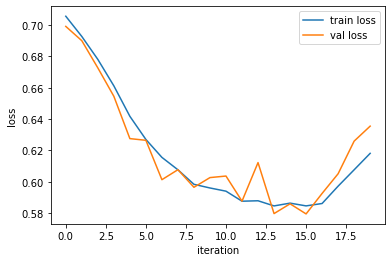

In [48]:
import matplotlib.pyplot as plt
plt.plot(rn.losses)
plt.plot(rn.val_losses)
plt.xlabel('iteration')
plt.ylabel('loss')
plt.legend(['train loss', 'val loss'])
plt.show()

In [49]:
rn.score(x_val_onehot, y_val)

0.632

In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN

In [22]:
model=Sequential()
model.add(SimpleRNN(32, input_shape=(100,100)))
model.add(Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn (SimpleRNN)       (None, 32)                4256      
_________________________________________________________________
dense (Dense)                (None, 1)                 33        
Total params: 4,289
Trainable params: 4,289
Non-trainable params: 0
_________________________________________________________________


In [23]:
model.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])
history=model.fit(x_train_onehot, y_train, epochs=20, batch_size=32,
                  validation_data=(x_val_onehot, y_val))

Epoch 1/20
625/625 [==============================] - 6s 9ms/step - loss: 0.7008 - accuracy: 0.5148 - val_loss: 0.6902 - val_accuracy: 0.5498
Epoch 2/20
625/625 [==============================] - 5s 8ms/step - loss: 0.6856 - accuracy: 0.5556 - val_loss: 0.6799 - val_accuracy: 0.5764
Epoch 3/20
625/625 [==============================] - 5s 8ms/step - loss: 0.6611 - accuracy: 0.6039 - val_loss: 0.6366 - val_accuracy: 0.6362
Epoch 4/20
625/625 [==============================] - 5s 8ms/step - loss: 0.6446 - accuracy: 0.6270 - val_loss: 0.6388 - val_accuracy: 0.6286
Epoch 5/20
625/625 [==============================] - 5s 8ms/step - loss: 0.6288 - accuracy: 0.6509 - val_loss: 0.6239 - val_accuracy: 0.6518
Epoch 6/20
625/625 [==============================] - 5s 8ms/step - loss: 0.6213 - accuracy: 0.6577 - val_loss: 0.5966 - val_accuracy: 0.6860
Epoch 7/20
625/625 [==============================] - 5s 8ms/step - loss: 0.6030 - accuracy: 0.6782 - val_loss: 0.6146 - val_accuracy: 0.6614
Epoch 

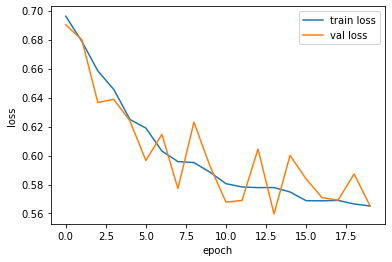

In [24]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train loss', 'val loss'])
plt.show()

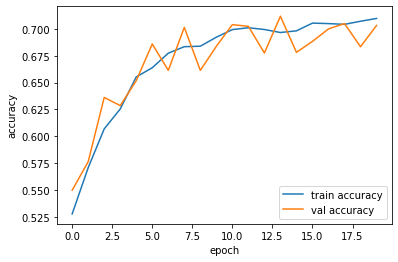

In [25]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train accuracy', 'val accuracy'])
plt.show()

In [39]:
loss, accuracy=model.evaluate(x_val_onehot, y_val, verbose=0)
print(accuracy)
print(loss)

0.7031999826431274
0.5650980472564697


In [27]:
from tensorflow.keras.layers import Embedding

In [28]:
(x_train_all, y_train_all),(x_test, y_test)=imdb.load_data(skip_top=20, num_words=1000)
for i in range (len(x_train_all)):
    x_train_all[i]=[w for w in x_train_all[i] if w>2]

x_train=x_train_all[random_index[:20000]]
y_train=y_train_all[random_index[:20000]]
x_val=x_train_all[random_index[20000:]]
y_val=y_train_all[random_index[20000:]]

<__array_function__ internals>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
C:\Users\Uijeong\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\datasets\imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
C:\Users\Uijeong\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\datasets\imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different length

In [29]:
maxlen=100
x_train_seq=sequence.pad_sequences(x_train, maxlen=maxlen)
x_val_seq=sequence.pad_sequences(x_val, maxlen=maxlen)

In [30]:
model_ebd=Sequential()
model_ebd.add(Embedding(1000,32))
model_ebd.add(SimpleRNN(8))
model_ebd.add(Dense(1, activation='sigmoid'))

model_ebd.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 32)          32000     
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, 8)                 328       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 9         
Total params: 32,337
Trainable params: 32,337
Non-trainable params: 0
_________________________________________________________________


In [33]:
model_ebd.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history=model_ebd.fit(x_train_seq, y_train, epochs=10, batch_size=32,
                  validation_data=(x_val_seq, y_val))

Epoch 1/10
625/625 [==============================] - 6s 9ms/step - loss: 0.5742 - accuracy: 0.6984 - val_loss: 0.5706 - val_accuracy: 0.7150
Epoch 2/10
625/625 [==============================] - 5s 8ms/step - loss: 0.4369 - accuracy: 0.8050 - val_loss: 0.4248 - val_accuracy: 0.8108
Epoch 3/10
625/625 [==============================] - 5s 8ms/step - loss: 0.3719 - accuracy: 0.8410 - val_loss: 0.4194 - val_accuracy: 0.8192
Epoch 4/10
625/625 [==============================] - 5s 8ms/step - loss: 0.3516 - accuracy: 0.8506 - val_loss: 0.4102 - val_accuracy: 0.8232
Epoch 5/10
625/625 [==============================] - 5s 8ms/step - loss: 0.3288 - accuracy: 0.8670 - val_loss: 0.4197 - val_accuracy: 0.8228
Epoch 6/10
625/625 [==============================] - 5s 8ms/step - loss: 0.3094 - accuracy: 0.8733 - val_loss: 0.4187 - val_accuracy: 0.8250
Epoch 7/10
625/625 [==============================] - 5s 9ms/step - loss: 0.2991 - accuracy: 0.8765 - val_loss: 0.4512 - val_accuracy: 0.8142
Epoch 

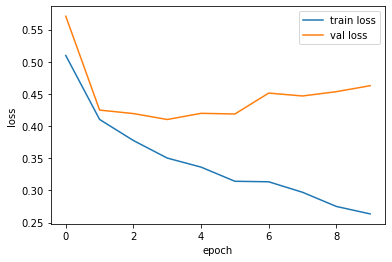

In [34]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train loss', 'val loss'])
plt.show()

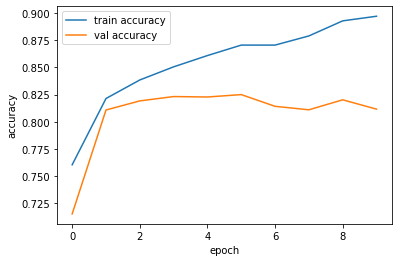

In [35]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train accuracy', 'val accuracy'])
plt.show()

In [38]:
loss, accuracy=model_ebd.evaluate(x_val_seq, y_val, verbose=0)
print(accuracy)
print(loss)

0.8116000294685364
0.4626845717430115


In [40]:
from tensorflow.keras.layers import LSTM

In [41]:
model_lstm=Sequential()
model_lstm.add(Embedding(1000,32))
model_lstm.add(LSTM(8))
model_lstm.add(Dense(1, activation='sigmoid'))

model_lstm.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 32)          32000     
_________________________________________________________________
lstm (LSTM)                  (None, 8)                 1312      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 9         
Total params: 33,321
Trainable params: 33,321
Non-trainable params: 0
_________________________________________________________________


In [42]:
model_lstm.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history=model_lstm.fit(x_train_seq, y_train, epochs=10, batch_size=32,
                  validation_data=(x_val_seq, y_val))

Epoch 1/10
625/625 [==============================] - 10s 13ms/step - loss: 0.5329 - accuracy: 0.7244 - val_loss: 0.3700 - val_accuracy: 0.8386
Epoch 2/10
625/625 [==============================] - 8s 13ms/step - loss: 0.3360 - accuracy: 0.8580 - val_loss: 0.3766 - val_accuracy: 0.8336
Epoch 3/10
625/625 [==============================] - 9s 14ms/step - loss: 0.3069 - accuracy: 0.8707 - val_loss: 0.3687 - val_accuracy: 0.8410
Epoch 4/10
625/625 [==============================] - 8s 14ms/step - loss: 0.2859 - accuracy: 0.8806 - val_loss: 0.3831 - val_accuracy: 0.8358
Epoch 5/10
625/625 [==============================] - 9s 14ms/step - loss: 0.2711 - accuracy: 0.8879 - val_loss: 0.3691 - val_accuracy: 0.8272
Epoch 6/10
625/625 [==============================] - 9s 14ms/step - loss: 0.2691 - accuracy: 0.8880 - val_loss: 0.3901 - val_accuracy: 0.8378
Epoch 7/10
625/625 [==============================] - 9s 14ms/step - loss: 0.2531 - accuracy: 0.8949 - val_loss: 0.3853 - val_accuracy: 0.831

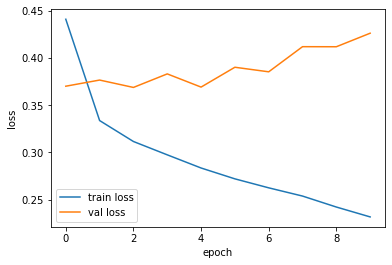

In [43]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train loss', 'val loss'])
plt.show()

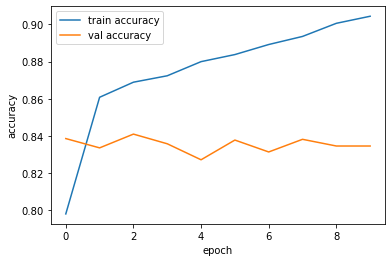

In [44]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train accuracy', 'val accuracy'])
plt.show()

In [45]:
loss, accuracy=model_lstm.evaluate(x_val_seq, y_val, verbose=0)
print(accuracy)
print(loss)

0.8345999717712402
0.42617034912109375
